# Introduction/Business Problems

It is always hard to find a good Airbnb for travelers new to the New York City. There are a lot of factors to considers, such as food, neighbourhood, locations, house reviews, availabilities, and etc. Customers usually have to do intensive research on the locations to mine the information about the factors they care, and this could be time consuming. Often people relies on some online reviews or recommendations but his is also inefficient. In this case, a clustering of the house choices could be both commercially and economically valuable.

#  Data Descriptions

The data comes from Kaggle.com, which is a platform for data science projects data as well as competitions. This datasets is originally from Airbnb website and is therefore an official data. It describes the 2019 Airbnb house providers' listing informations. This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb

%matplotlib inline

In [57]:
# The code was removed by Watson Studio for sharing.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Exploratory Data Analysis

In [58]:
raw_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [59]:
from sklearn.preprocessing import normalize
eda_data = raw_data.dropna().select_dtypes(include = ['float', 'int'])
eda_data = pd.DataFrame(normalize(eda_data))
eda_data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.669631,0.735038,0.010720,-0.019509,0.039297,0.000264,0.002374,0.000055,0.001582,0.096264
1,0.669717,0.734237,0.010518,-0.019094,0.058068,0.000258,0.011614,0.000098,0.000516,0.091618
2,0.617347,0.784615,0.006556,-0.011918,0.014342,0.000161,0.043509,0.000748,0.000161,0.031262
3,0.572462,0.819822,0.004651,-0.008429,0.009119,0.001140,0.001026,0.000011,0.000114,0.000000
4,0.571226,0.820263,0.004565,-0.008287,0.022405,0.000336,0.008290,0.000066,0.000112,0.014452


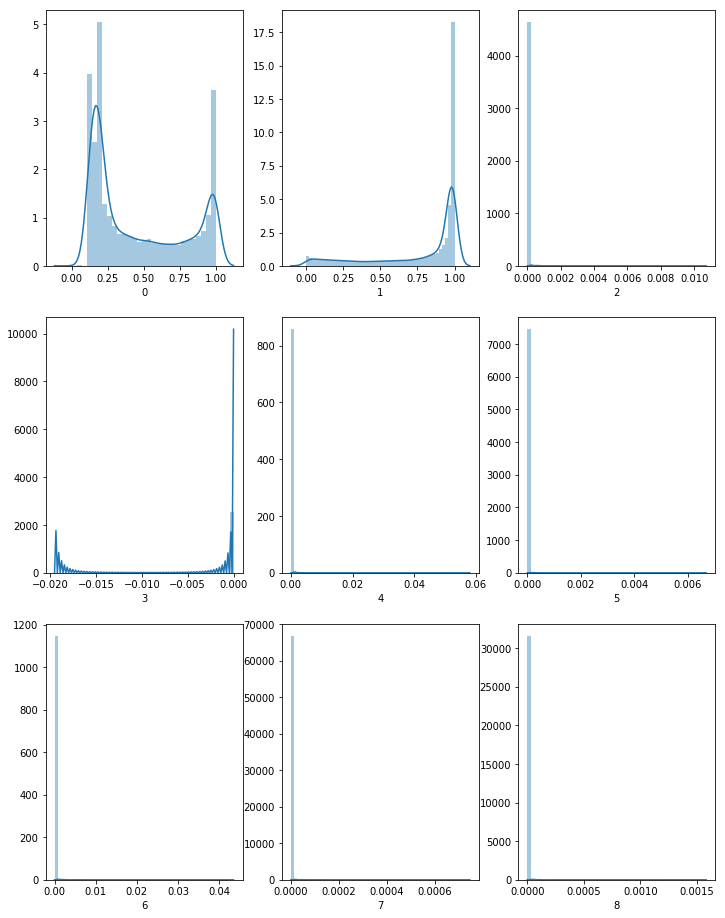

In [60]:
# see the data distribution situation
fig, axes = plt.subplots(3,3, figsize=(12, 16), sharex=False)
sb.distplot(eda_data.iloc[:,0], ax = axes[0, 0])
sb.distplot(eda_data.iloc[:,1], ax = axes[0, 1])
sb.distplot(eda_data.iloc[:,2], ax = axes[0, 2])
sb.distplot(eda_data.iloc[:,3], ax = axes[1, 0])
sb.distplot(eda_data.iloc[:,4], ax = axes[1, 1])
sb.distplot(eda_data.iloc[:,5], ax = axes[1, 2])
sb.distplot(eda_data.iloc[:,6], ax = axes[2, 0])
sb.distplot(eda_data.iloc[:,7], ax = axes[2, 1])
sb.distplot(eda_data.iloc[:,8], ax = axes[2, 2])

This is not a good distribution as it has too many outliers

In [61]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
eda_data = raw_data.dropna().select_dtypes(include = ['float', 'int'])
eda_data = pd.DataFrame(mms.fit_transform(eda_data))
eda_data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000001,0.346932,0.511921,0.0149,0.000000,0.012739,0.003419,0.015337,1.000000
1,0.000002,0.000001,0.607918,0.490469,0.0225,0.000000,0.070064,0.006326,0.003067,0.972603
2,0.000035,0.000009,0.439518,0.535649,0.0089,0.000000,0.428344,0.079159,0.000000,0.531507
3,0.000068,0.000017,0.718308,0.565324,0.0080,0.007206,0.012739,0.001539,0.000000,0.000000
4,0.000070,0.000018,0.593287,0.506972,0.0200,0.001601,0.116242,0.009916,0.000000,0.353425


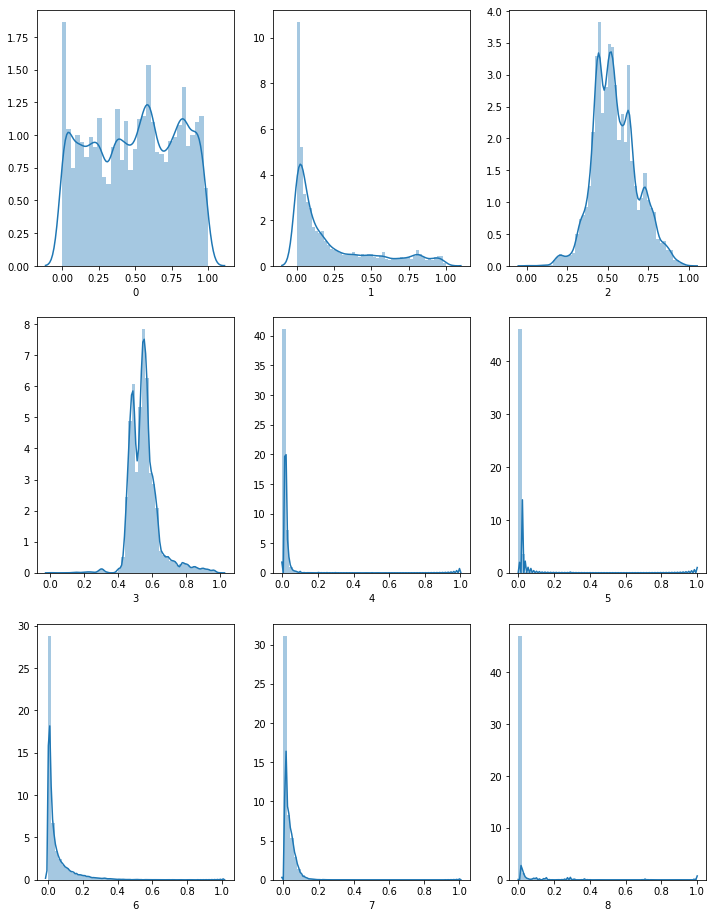

In [62]:

fig, axes = plt.subplots(3,3, figsize=(12, 16), sharex=False)
sb.distplot(eda_data.iloc[:,0], ax = axes[0, 0])
sb.distplot(eda_data.iloc[:,1], ax = axes[0, 1])
sb.distplot(eda_data.iloc[:,2], ax = axes[0, 2])
sb.distplot(eda_data.iloc[:,3], ax = axes[1, 0])
sb.distplot(eda_data.iloc[:,4], ax = axes[1, 1])
sb.distplot(eda_data.iloc[:,5], ax = axes[1, 2])
sb.distplot(eda_data.iloc[:,6], ax = axes[2, 0])
sb.distplot(eda_data.iloc[:,7], ax = axes[2, 1])
sb.distplot(eda_data.iloc[:,8], ax = axes[2, 2])

Let's see the price

In [63]:
# average price by neighborhood top 10 
raw_data[['neighbourhood', 'price']].groupby(['neighbourhood']).mean().sort_values(by = 'price', ascending = False)[: 10]

,price
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
Prince's Bay,409.500000
Battery Park City,367.557143
Flatiron District,341.925000
Randall Manor,336.000000


In [64]:
# average availability by neighborhood top 10 
raw_data[['neighbourhood', 'availability_365']].groupby(['neighbourhood']).mean().sort_values(by = 'availability_365', ascending = False)[: 10]

,availability_365
neighbourhood,
Fort Wadsworth,365.000000
Co-op City,364.000000
Willowbrook,351.000000
Eastchester,333.461538
Richmondtown,300.000000
Mill Basin,290.000000
Edgemere,275.272727
Randall Manor,275.210526
West Brighton,274.722222


In [65]:
# average review per month by neighborhood top 10 to see popularity
raw_data[['neighbourhood', 'reviews_per_month']].groupby(['neighbourhood']).mean().sort_values(by = 'reviews_per_month', ascending = False)[: 10]

,reviews_per_month
neighbourhood,
New Dorp Beach,5.500000
East Elmhurst,4.822982
Springfield Gardens,4.455250
Silver Lake,4.340000
Rosebank,3.812857
Huguenot,3.760000
Whitestone,3.320000
Jamaica Hills,3.315714
Queens Village,3.220800


## Clustering

In [66]:
!pip install datetime #python datetime package

In [96]:
from sklearn.cluster import KMeans 

import datetime
# re-creating the training dataframe
df = raw_data.iloc[:, 6:]
df.head()
df.dropna(inplace = True)


In [97]:

# constructing days before last review to today
df['last_review'] = df['last_review'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df['last_review_days'] = df['last_review'].apply(lambda x: (x - datetime.datetime.now())).dt.days
df['last_review_days'] = df['last_review_days']*(-1)

In [98]:
df.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_days
0,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,335
1,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,121
3,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,76
4,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,304
5,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,89


In [99]:
label = pd.get_dummies(df[['room_type']])
label.head()

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0
1,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [100]:
neighb = pd.get_dummies(raw_data.dropna()[['neighbourhood']])
neighb.head()

,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",...,neighbourhood_Westchester Square,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df_labeled = pd.concat([df, label, neighb],  axis = 1)
df_labeled.drop(columns = ['room_type', 'last_review'], inplace =True)
df_labeled.fillna(df_labeled.mean(), inplace = True)
df_labeled.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_days,room_type_Entire home/apt,...,neighbourhood_Westchester Square,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside
0,40.64749,-73.97237,149,1,9,0.21,6,365,335,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.75362,-73.98377,225,1,45,0.38,2,355,121,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.68514,-73.95976,89,1,270,4.64,1,194,76,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.79851,-73.94399,80,10,9,0.10,1,0,304,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,40.74767,-73.97500,200,3,74,0.59,1,129,89,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
# scale the data
df_scaled = mms.fit_transform(df_labeled)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [103]:
# finding the best k
distance = []
k = []
for x in range(1, 20):
    km = KMeans(x)
    km.fit(df_scaled)
    k.append(x)
    distance.append(km.inertia_)

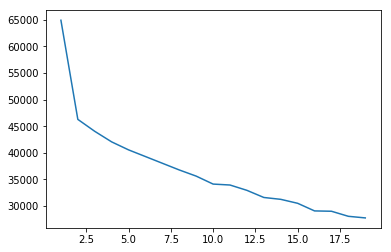

In [104]:
sb.lineplot(k, distance)

In [112]:
# let's try k = 16
km = KMeans(16)
km.fit(df_scaled)
df['cluster'] = km.labels_


In [113]:
cluster_center = pd.DataFrame(mms.inverse_transform(km.cluster_centers_))
cluster_center.columns = df_labeled.columns
cluster_center

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_days,room_type_Entire home/apt,...,neighbourhood_Westchester Square,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside
0,40.729108,-73.946068,83.738699,4.006416,25.262321,1.340206,2.038933,33.503791,412.645378,-9.614531e-14,...,5.835647e-04,1.458827e-04,5.835309e-04,1.021855e-03,1.069246e-04,3.380480e-08,3.212259e-03,2.481291e-03,7.294474e-04,1.006699e-02
1,40.696615,-73.920056,62.444611,4.169910,23.256737,1.249147,2.663922,93.948353,378.988772,1.443290e-15,...,-5.068645e-18,5.149960e-19,2.005774e-18,-9.324139e-18,1.290634e-15,2.574980e-19,3.295975e-17,-4.054916e-17,2.818926e-18,-7.025630e-17
2,40.726870,-73.984063,213.809474,6.121053,28.069474,1.102621,1.974737,80.303158,413.904211,1.000000e+00,...,-4.526544e-18,6.369688e-19,2.493665e-18,-1.604619e-17,-5.551115e-17,3.184844e-19,4.076600e-17,-3.621235e-17,-2.873136e-18,4.510281e-17
3,40.711757,-73.950630,83.480610,5.335664,26.229498,1.112092,1.594406,71.911634,446.668150,1.443290e-15,...,-5.285486e-18,-2.439455e-19,-1.029992e-18,1.409463e-18,1.000000e+00,-1.219727e-19,-1.561251e-17,-4.228388e-17,4.933120e-18,-1.136244e-16
4,40.672888,-73.947556,154.754977,5.462481,30.964778,1.335804,1.473201,109.362940,348.856049,1.000000e+00,...,-3.632077e-18,-1.761829e-19,-7.589415e-19,-1.084202e-18,-7.494005e-16,-8.809143e-20,-1.127570e-17,-2.905662e-17,-2.114194e-18,5.117434e-17
5,40.713270,-73.953153,197.137667,5.725940,27.772467,1.087393,1.286807,85.502868,377.956023,1.000000e+00,...,-5.285486e-18,-2.303930e-19,-9.757820e-19,1.301043e-18,1.000000e+00,-1.151965e-19,-1.474515e-17,-4.228388e-17,4.878910e-18,-1.127570e-16
6,40.729624,-73.960186,177.282801,5.565828,20.309427,1.083797,1.957059,25.694539,438.041922,1.000000e+00,...,2.267608e-04,3.502278e-08,1.400911e-07,2.271986e-04,5.538853e-05,1.751139e-08,7.706751e-03,7.943721e-04,2.267958e-04,3.062120e-03
7,40.687866,-73.939548,68.107230,4.939338,26.939338,1.429504,2.965686,120.630515,329.349877,1.443290e-15,...,-5.312591e-18,-3.997996e-19,-1.653408e-18,3.577867e-18,1.887379e-15,-1.998998e-19,-2.558717e-17,-4.250073e-17,5.366801e-18,-1.222980e-16
8,40.732073,-73.942960,63.213948,4.398345,22.761229,1.471726,4.763593,165.998818,293.580378,1.443290e-15,...,-4.282599e-18,4.133521e-19,1.599198e-18,-1.203464e-17,2.482270e-02,2.066760e-19,2.645453e-17,2.364066e-03,1.182033e-03,1.182033e-03
9,40.817016,-73.948214,80.077519,4.661240,33.918605,1.380612,2.729457,117.790698,340.668217,1.443290e-15,...,-5.014435e-18,6.911789e-19,2.710505e-18,-1.192622e-17,1.179612e-15,3.455894e-19,4.423545e-17,-4.011548e-17,2.276825e-18,-6.071532e-17


In [114]:
df['name'] = raw_data['name']
df.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_days,cluster,name
0,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,335,10,Clean & quiet apt home by the park
1,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,121,11,Skylit Midtown Castle
3,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,76,11,Cozy Entire Floor of Brownstone
4,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,304,6,Entire Apt: Spacious Studio/Loft by central park
5,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,89,6,Large Cozy 1 BR Apartment In Midtown East


## Visualize on the map

In [115]:
!pip install folium
import folium

In [116]:

cluster1 = df[df['cluster'] == 0].sort_values(by = ['reviews_per_month'], ascending = False).iloc[:5,:]
cluster2 = df[df['cluster'] == 1].sort_values(by = ['reviews_per_month'], ascending = False).iloc[:5,:]
cluster3 = df[df['cluster'] == 2].sort_values(by = ['reviews_per_month'], ascending = False).iloc[:5,:]
cluster4 = df[df['cluster'] == 3].sort_values(by = ['reviews_per_month'], ascending = False).iloc[:5,:]
cluster5 = df[df['cluster'] == 4].sort_values(by = ['reviews_per_month'], ascending = False).iloc[:5,:]
cluster_center['name'] = cluster_center.index.values
cluster_center

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_days,room_type_Entire home/apt,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,name
0,40.729108,-73.946068,83.738699,4.006416,25.262321,1.340206,2.038933,33.503791,412.645378,-9.614531e-14,...,1.458827e-04,5.835309e-04,1.021855e-03,1.069246e-04,3.380480e-08,3.212259e-03,2.481291e-03,7.294474e-04,1.006699e-02,0
1,40.696615,-73.920056,62.444611,4.169910,23.256737,1.249147,2.663922,93.948353,378.988772,1.443290e-15,...,5.149960e-19,2.005774e-18,-9.324139e-18,1.290634e-15,2.574980e-19,3.295975e-17,-4.054916e-17,2.818926e-18,-7.025630e-17,1
2,40.726870,-73.984063,213.809474,6.121053,28.069474,1.102621,1.974737,80.303158,413.904211,1.000000e+00,...,6.369688e-19,2.493665e-18,-1.604619e-17,-5.551115e-17,3.184844e-19,4.076600e-17,-3.621235e-17,-2.873136e-18,4.510281e-17,2
3,40.711757,-73.950630,83.480610,5.335664,26.229498,1.112092,1.594406,71.911634,446.668150,1.443290e-15,...,-2.439455e-19,-1.029992e-18,1.409463e-18,1.000000e+00,-1.219727e-19,-1.561251e-17,-4.228388e-17,4.933120e-18,-1.136244e-16,3
4,40.672888,-73.947556,154.754977,5.462481,30.964778,1.335804,1.473201,109.362940,348.856049,1.000000e+00,...,-1.761829e-19,-7.589415e-19,-1.084202e-18,-7.494005e-16,-8.809143e-20,-1.127570e-17,-2.905662e-17,-2.114194e-18,5.117434e-17,4
5,40.713270,-73.953153,197.137667,5.725940,27.772467,1.087393,1.286807,85.502868,377.956023,1.000000e+00,...,-2.303930e-19,-9.757820e-19,1.301043e-18,1.000000e+00,-1.151965e-19,-1.474515e-17,-4.228388e-17,4.878910e-18,-1.127570e-16,5
6,40.729624,-73.960186,177.282801,5.565828,20.309427,1.083797,1.957059,25.694539,438.041922,1.000000e+00,...,3.502278e-08,1.400911e-07,2.271986e-04,5.538853e-05,1.751139e-08,7.706751e-03,7.943721e-04,2.267958e-04,3.062120e-03,6
7,40.687866,-73.939548,68.107230,4.939338,26.939338,1.429504,2.965686,120.630515,329.349877,1.443290e-15,...,-3.997996e-19,-1.653408e-18,3.577867e-18,1.887379e-15,-1.998998e-19,-2.558717e-17,-4.250073e-17,5.366801e-18,-1.222980e-16,7
8,40.732073,-73.942960,63.213948,4.398345,22.761229,1.471726,4.763593,165.998818,293.580378,1.443290e-15,...,4.133521e-19,1.599198e-18,-1.203464e-17,2.482270e-02,2.066760e-19,2.645453e-17,2.364066e-03,1.182033e-03,1.182033e-03,8
9,40.817016,-73.948214,80.077519,4.661240,33.918605,1.380612,2.729457,117.790698,340.668217,1.443290e-15,...,6.911789e-19,2.710505e-18,-1.192622e-17,1.179612e-15,3.455894e-19,4.423545e-17,-4.011548e-17,2.276825e-18,-6.071532e-17,9


In [117]:
map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start = 12)

#add stickers based on clusters

for x,y,n in cluster_center[['latitude', 'longitude', 'name']].values.tolist():
    folium.Marker([x,y], tooltip=n, icon=folium.Icon(icon='cloud')).add_to(map)

for x,y,n in cluster1[['latitude', 'longitude', 'name']].values.tolist():
    folium.Marker([x,y], tooltip=n, icon=folium.Icon(color = 'red')).add_to(map)
for x,y,n in cluster2[['latitude', 'longitude', 'name']].values.tolist():
    folium.Marker([x,y], tooltip=n, icon=folium.Icon(color = 'blue')).add_to(map)
for x,y,n in cluster3[['latitude', 'longitude', 'name']].values.tolist():
    folium.Marker([x,y], tooltip=n, icon=folium.Icon(color = 'orange')).add_to(map)
for x,y,n in cluster4[['latitude', 'longitude', 'name']].values.tolist():
    folium.Marker([x,y], tooltip=n, icon=folium.Icon(color = 'pink')).add_to(map)
for x,y,n in cluster5[['latitude', 'longitude', 'name']].values.tolist():
    folium.Marker([x,y], tooltip=n, icon=folium.Icon(color = 'black')).add_to(map)


In [118]:
map # due to large number of clusters I only showed 5 clusters, but showed the centroids of all 16 groups with the icon 'cloud'